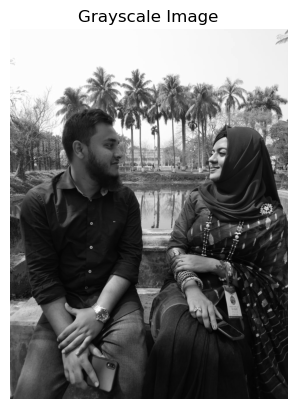

True

In [6]:

#1. To create a program to display grayscale image using read and write operation.

import cv2
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('a.jpg')

# Convert the image to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image using Matplotlib
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

# Write the grayscale image
cv2.imwrite('grayscale_image.jpg', grayscale_image)


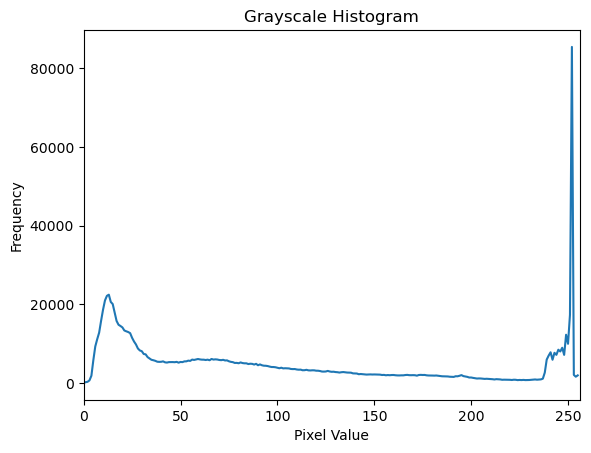

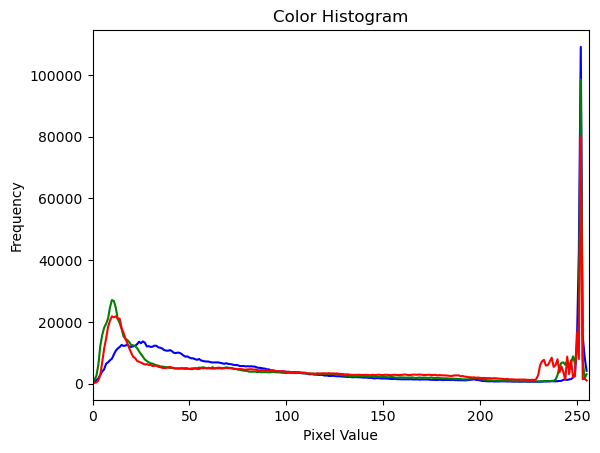

In [13]:
#2.To create a vision program to find histogram value and display histograph of a grayscale and color image.
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display a grayscale histogram
def plot_grayscale_histogram(image):
    # Convert the input image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Calculate the histogram of the grayscale image
    histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    # Create a new Matplotlib figure
    plt.figure()
    
    # Set the title and labels for the grayscale histogram plot
    plt.title('Grayscale Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    
    # Plot the grayscale histogram
    plt.plot(histogram)
    
    # Set the X-axis range from 0 to 256 (pixel values)
    plt.xlim([0, 256])
    
    # Show the grayscale histogram plot
    plt.show()

# Function to display a color histogram
def plot_color_histogram(image):
    color_histograms = []
    
    # Iterate over the three color channels (blue, green, and red)
    for i in range(3):
        # Calculate the histogram for each color channel
        histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
        color_histograms.append(histogram)

    colors = ('b', 'g', 'r')
    
    # Create a new Matplotlib figure
    plt.figure()
    
    # Set the title and labels for the color histogram plot
    plt.title('Color Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    
    # Plot the color histograms for each channel with different colors
    for i in range(3):
        plt.plot(color_histograms[i], color=colors[i])
    
    # Set the X-axis range from 0 to 256 (pixel values)
    plt.xlim([0, 256])
    
    # Show the color histogram plot
    plt.show()

# Load an image (replace 'your_image.jpg' with the path to your image)
image = cv2.imread('a.jpg')

# Display histograms
plot_grayscale_histogram(image)  # Display grayscale histogram
plot_color_histogram(image)      # Display color histogram



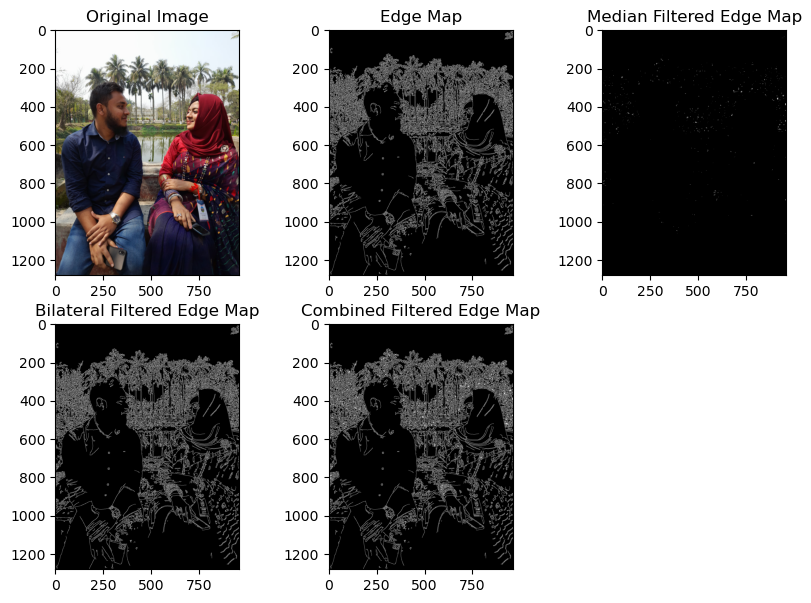

In [14]:
#To create a vision program for Non-Linear Filtering technique using edge detection

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('a.jpg')

# Convert the image to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection to the grayscale image
edges = cv2.Canny(grayscale_image, 50, 150)

# Apply median filtering to the edge map
median_filtered_edges = cv2.medianBlur(edges, 7)

# Apply bilateral filtering to the edge map
bilateral_filtered_edges = cv2.bilateralFilter(edges, 9, 75, 75)

# Combine the median filtered and bilateral filtered edge maps
combined_filtered_edges = cv2.add(median_filtered_edges, bilateral_filtered_edges)

# Display the original image, the edge map, and the filtered edge map using Matplotlib
plt.figure(figsize=(10, 7))

plt.subplot(231), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(232), plt.imshow(edges, cmap='gray'), plt.title('Edge Map')
plt.subplot(233), plt.imshow(median_filtered_edges, cmap='gray'), plt.title('Median Filtered Edge Map')
plt.subplot(234), plt.imshow(bilateral_filtered_edges, cmap='gray'), plt.title('Bilateral Filtered Edge Map')
plt.subplot(235), plt.imshow(combined_filtered_edges, cmap='gray'), plt.title('Combined Filtered Edge Map')

plt.show()



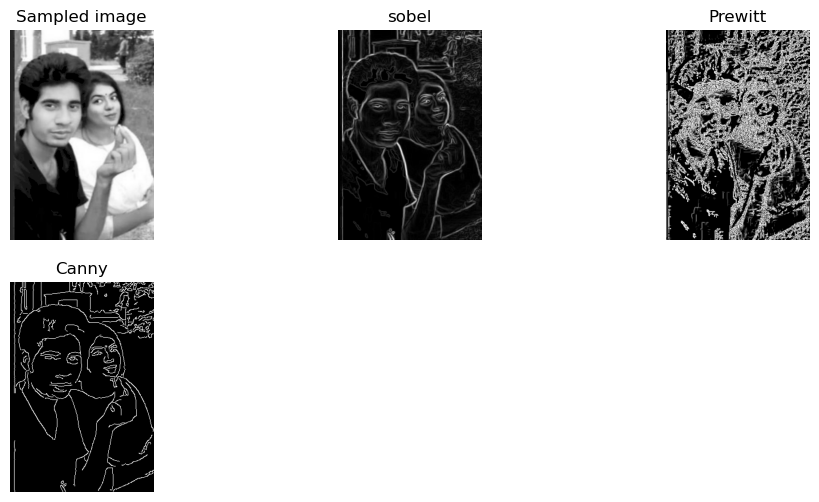

In [15]:
#4.To create a vision program to determine the edge detection of an image using different operators

import cv2
import numpy as np

# Load the image in grayscale
image = cv2.imread('a.png', cv2.IMREAD_GRAYSCALE)

if image is not None:
    # Apply edge detection using different operators
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_edge = np.sqrt(sobel_x**2 + sobel_y**2)

    prewitt_x = cv2.filter2D(image, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
    prewitt_y = cv2.filter2D(image, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
    prewitt_edge = np.sqrt(prewitt_x**2 + prewitt_y**2)

    canny_edge = cv2.Canny(image, 100, 200)  # You can adjust the thresholds as needed

    # Display the original image and the edge-detected images
                                                  
    plt.figure(figsize=(12,6))
    
    plt.subplot(2,3,1)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title('Sampled image')
    plt.axis('off')
    
    plt.subplot(2,3,2)
    plt.imshow(sobel_edge,cmap='gray')
    plt.title('sobel')
    plt.axis('off')
    
    plt.subplot(2,3,3)
    plt.imshow(prewitt_edge,cmap='gray')
    plt.title('Prewitt')
    plt.axis('off')
    
    plt.subplot(2,3,4)
    plt.imshow(canny_edge,cmap='gray')
    plt.title('Canny')
    plt.axis('off')
    
    plt.show()
                                                   
    
else:
    print("Image not found or couldn't be loaded.")


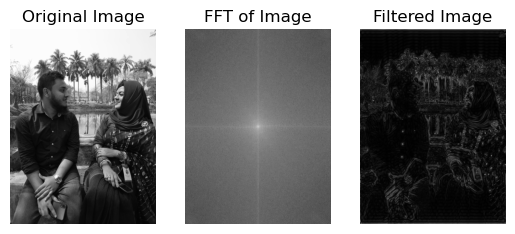

In [17]:
#6.To create a program to discretize an image using Fourier transformation.
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
import cv2

# Load an image
image = cv2.imread('a.jpg', cv2.IMREAD_GRAYSCALE)

# Perform 2D FFT on the image
image_fft = fft2(image)

# Shift the zero frequency components to the center
image_fft_shifted = fftshift(image_fft)

# Apply a high-pass filter in the frequency domain to retain only certain components
# Here, we'll zero out the low-frequency components in a circular region
# and keep the high-frequency components
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
radius = 30  # Adjust this radius as needed
mask = np.ones((rows, cols), dtype=complex)
mask[crow - radius:crow + radius, ccol - radius:ccol + radius] = 0
image_fft_shifted_filtered = image_fft_shifted * mask

# Shift the zero frequency components back to the top-left corner
image_fft_filtered = ifftshift(image_fft_shifted_filtered)

# Perform the inverse FFT to get the filtered image in the spatial domain
filtered_image = np.abs(ifft2(image_fft_filtered))

# Display the original and filtered images
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(132), plt.imshow(np.log(1 + np.abs(image_fft_shifted)), cmap='gray')
plt.title('FFT of Image'), plt.axis('off')
plt.subplot(133), plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image'), plt.axis('off')

plt.show()


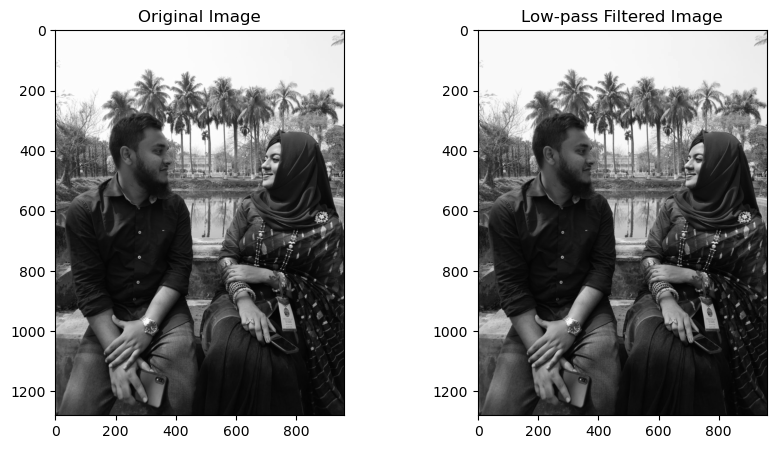

In [9]:
#6.To create a program to eliminate the high frequency components of an image.
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('a.jpg')
original_image = image.copy()

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Fourier Transform to the image
f_transform = np.fft.fft2(gray)
f_transform_shifted = np.fft.fftshift(f_transform)

# Create a mask to eliminate high-frequency components (low-pass filter)
rows, cols = gray.shape
crow, ccol = rows // 2, cols // 2
mask_radius = 30  # Adjust this value to control the amount of high-frequency removal
mask = np.ones((rows, cols), np.uint8)
center = (crow, ccol)
cv2.circle(mask, center, mask_radius, 0, thickness=-1)

# Apply the mask to the shifted Fourier Transform
f_transform_shifted_lowpass = f_transform_shifted * mask

# Inverse Fourier Transform to get the image back
f_transform_lowpass = np.fft.ifftshift(f_transform_shifted_lowpass)
image_lowpass = np.fft.ifft2(f_transform_lowpass)
image_lowpass = np.abs(image_lowpass)

# Display the original and low-pass filtered images using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(image_lowpass, cmap='gray'), plt.title('Low-pass Filtered Image')

plt.show()


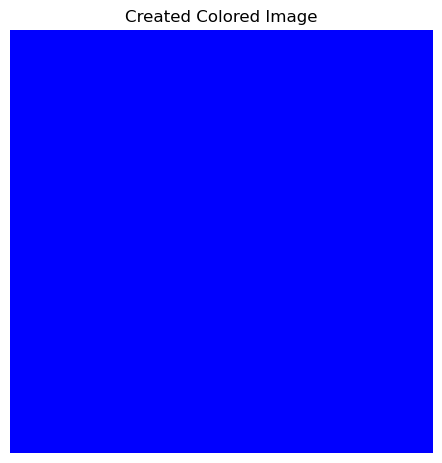

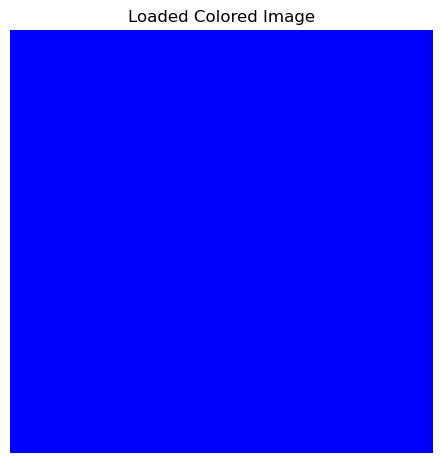

In [18]:
#To create a color image and perform read and write operation
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a blank color image (here, a red square on a black background)
image = np.zeros((300, 300, 3), dtype=np.uint8)
image[:, :] = [0, 0, 255]  # Set the color (BGR format, so [0, 0, 255] represents red)

# Display the created image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Created Colored Image')
plt.imshow(image)
plt.axis('off')
plt.show()


# Save the image to a file
cv2.imwrite('created_image.png', image)

# Read the saved image
loaded_image = cv2.imread('created_image.png')

# Display the loaded image
if loaded_image is not None:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 2)
    plt.title('Loaded Colored Image')
    plt.imshow(loaded_image)  
    plt.axis('off')
    plt.show()
else:
    print("Image not found or couldn't be loaded.")


R: 182, G: 187, B: 181


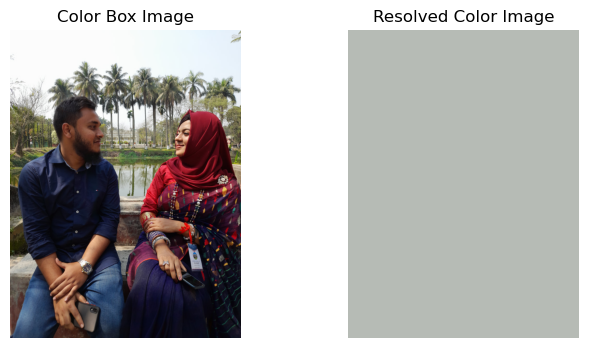

In [7]:
#8.To obtain the R, B, G colour values and resolved colour values from a colour box by choosing any colour.

import cv2
import matplotlib.pyplot as plt

# Load the color box image
image = cv2.imread('a.jpg')  # Replace with your image file path

# Get the RGB values of a pixel from the center of the image (you can choose any pixel)
height, width, _ = image.shape
center_x, center_y = width // 2, height // 2
pixel_color = image[center_y, center_x]

# Extract the B, G, and R color values
b, g, r = pixel_color
print(f"R: {r}, G: {g}, B: {b}")
# Display the original color box image
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Color Box Image")
plt.axis('off')

# Create a new image with the resolved color
resolved_color_image = image.copy()
resolved_color_image[:] = pixel_color

# Display the resolved color image
plt.subplot(122)
plt.imshow(cv2.cvtColor(resolved_color_image, cv2.COLOR_BGR2RGB))
plt.title("Resolved Color Image")
plt.axis('off')

plt.show()

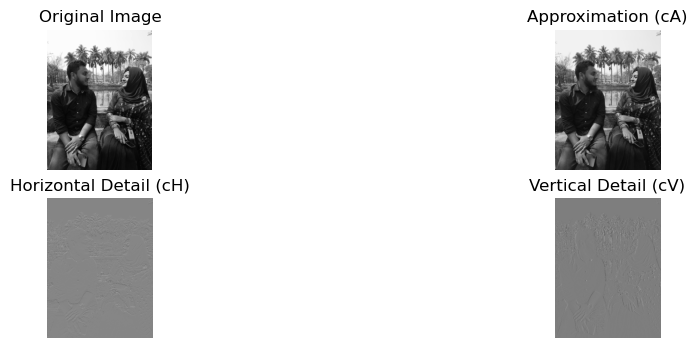

In [20]:
#To create a program performs discrete wavelet transform on image.
import cv2
import pywt
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('a.jpg', cv2.IMREAD_GRAYSCALE)

# Perform DWT on the image
coeffs = pywt.dwt2(image, 'bior1.3')

# Extract the approximation (cA) and detail (cH, cV, cD) coefficients
cA, (cH, cV, cD) = coeffs

# Display the original and DWT coefficients
plt.figure(figsize=(12, 4))
plt.subplot(2, 2, 1), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(2, 2, 2), plt.imshow(cA, cmap='gray')
plt.title('Approximation (cA)'), plt.axis('off')
plt.subplot(2, 2, 3), plt.imshow(cH, cmap='gray')
plt.title('Horizontal Detail (cH)'), plt.axis('off')
plt.subplot(2, 2, 4), plt.imshow(cV, cmap='gray')
plt.title('Vertical Detail (cV)'), plt.axis('off')

plt.show()


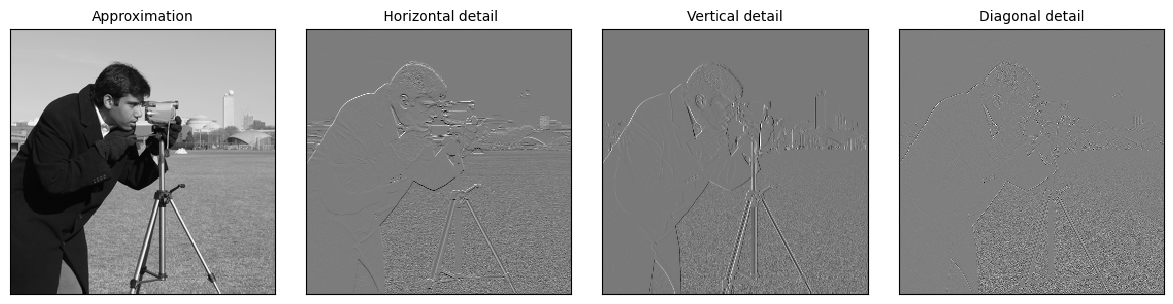

In [12]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

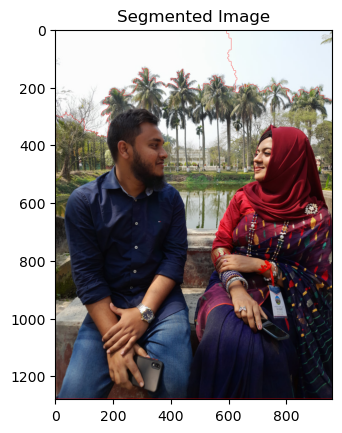

In [20]:
#10.To create a program for segmentation of an image using watershed transforms
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('a.jpg')
original_image = image.copy()

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary mask
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Perform morphological operations to remove noise and prepare the image
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Perform distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Subtract the sure foreground from sure background
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Label markers
_, markers = cv2.connectedComponents(sure_fg)

# Add one to all the labels to distinguish sure regions from unknown
markers = markers + 1
markers[unknown == 255] = 0

# Apply the Watershed Transform
cv2.watershed(image, markers)
image[markers == -1] = [0, 0, 255]  # Mark watershed boundaries with red color

# Display the segmented image using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image')
plt.show()


In [ ]:
#To understand the fundamental concepts of image filtering and enhancement by implementing different techniques using a programming language such as Python with libraries like OpenCV

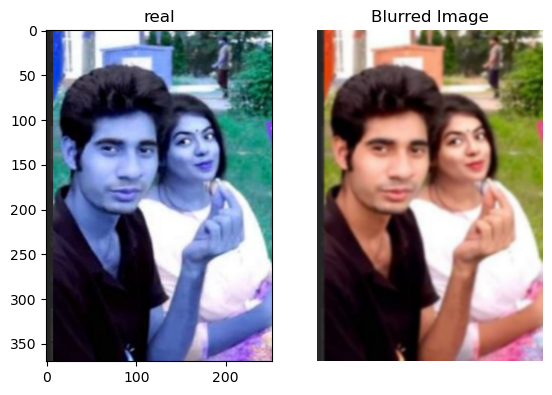

In [27]:
#different type of noise
import cv2
import numpy as np
from matplotlib import pyplot as plt


# Upload file
#noisy_image =files.upload()

# Show the iamge
#Image(noisy_image)

# Load the noisy image
noisy_image = cv2.imread('a.jpg', 0)  # Load as grayscale

# Add different types of noise to the image
# Example: Gaussian, Salt-and-Pepper, Speckle
gaussian_noise = np.random.normal(0, 30, noisy_image.shape).astype(np.uint8)
noisy_image_with_gaussian = cv2.add(noisy_image, gaussian_noise)

salt_and_pepper = np.random.randint(0, 2, noisy_image.shape) * 255
salt_and_pepper_noise = np.zeros_like(noisy_image)
salt_and_pepper_noise[salt_and_pepper == 255] = 255
noisy_image_with_salt_and_pepper = cv2.add(noisy_image, salt_and_pepper_noise)

speckle = noisy_image + noisy_image * 0.5 * np.random.randn(*noisy_image.shape)
noisy_image_with_speckle = speckle.astype(np.uint8)

# Apply noise reduction techniques
# Gaussian Noise Reduction using Gaussian Blur
gaussian_blur = cv2.GaussianBlur(noisy_image_with_gaussian, (5, 5), 0)

# Salt-and-Pepper Noise Reduction using Median Filter
median_filtered = cv2.medianBlur(noisy_image_with_salt_and_pepper, 5)

# Speckle Noise Reduction using Bilateral Filter
bilateral_filtered = cv2.bilateralFilter(noisy_image_with_speckle, 9, 75, 75)

# Display the images using Matplotlib
plt.figure(figsize=(12, 12))

plt.subplot(2, 3, 1), plt.imshow(noisy_image_with_gaussian, cmap='gray'), plt.title('Gaussian Noise')
plt.subplot(2, 3, 2), plt.imshow(gaussian_blur, cmap='gray'), plt.title('Gaussian Blur')
plt.subplot(2, 3, 3), plt.imshow(noisy_image_with_salt_and_pepper, cmap='gray'), plt.title('Salt-and-Pepper Noise')
plt.subplot(2, 3, 4), plt.imshow(median_filtered, cmap='gray'), plt.title('Median Filter')
plt.subplot(2, 3, 5), plt.imshow(noisy_image_with_speckle, cmap='gray'), plt.title('Speckle Noise')
plt.subplot(2, 3, 6), plt.imshow(bilateral_filtered, cmap='gray'), plt.title('Bilateral Filter')
plt.show()



In [ ]:
#blur filter
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('a.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Smoothing Filters
blur = cv2.GaussianBlur(gray_image, (5, 5), 0)  # Gaussian Blur

median = cv2.medianBlur(gray_image, 5)  # Median Filter

# Sharpening Filter (Laplacian)
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

# Histogram Equalization
equalized_image = cv2.equalizeHist(gray_image)

# Edge Detection (Canny)
edges = cv2.Canny(gray_image, 100, 200)

# Displaying the images using Matplotlib
plt.figure(figsize=(12, 12))

plt.subplot(2, 3, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(2, 3, 2), plt.imshow(gray_image, cmap='gray'), plt.title('Grayscale Image')
plt.subplot(2, 3, 3), plt.imshow(blur, cmap='gray'), plt.title('Gaussian Blur')
plt.subplot(2, 3, 4), plt.imshow(median, cmap='gray'), plt.title('Median Filter')
plt.subplot(2, 3, 5), plt.imshow(laplacian, cmap='gray'), plt.title('Laplacian Filter')
plt.subplot(2, 3, 6), plt.imshow(equalized_image, cmap='gray'), plt.title('Histogram Equalization')
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(edges, cmap='gray'), plt.title('Edge Detection (Canny)')
plt.show()


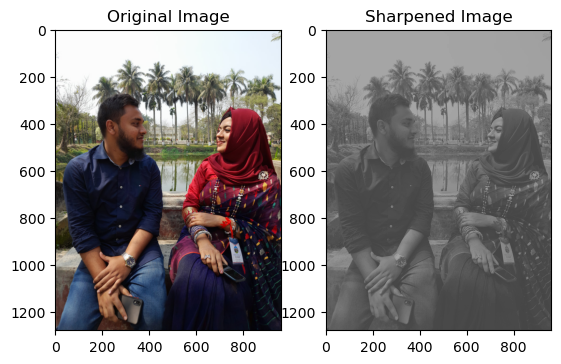

In [28]:
#sharpening

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('a.jpg')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Laplacian filter for sharpening
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
sharpened_image = gray_image - 0.5 * laplacian

# Display the original and sharpened images
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')

plt.show()


In [ ]:
#quantization
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('a.jpg')

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

# Image Sampling
def image_sampling(img, factor):
    sampled_img = img[::factor, ::factor]
    return sampled_img

# Image Quantization
def image_quantization(img, levels):
    quantized_img = np.floor_divide(img, 256 // levels) * (256 // levels)
    return quantized_img

# Sampling the image by a factor of 2
sampled_image = image_sampling(image, 2)

# Quantizing the image to 4 levels
quantized_image = image_quantization(image, 4)

# Display the sampled image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(sampled_image, cv2.COLOR_BGR2RGB))
plt.title('Sampled Image (Factor: 2)')
plt.axis('off')
plt.show()

# Display the quantized image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(quantized_image, cv2.COLOR_BGR2RGB))
plt.title('Quantized Image (Levels: 4)')
plt.axis('off')
plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Display the original and equalized images
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.show()



In [ ]:
To comprehend the concept of noise in digital images, identify different types of noise, and implement basic noise reduction techniques using Python with libraries like OpenCV

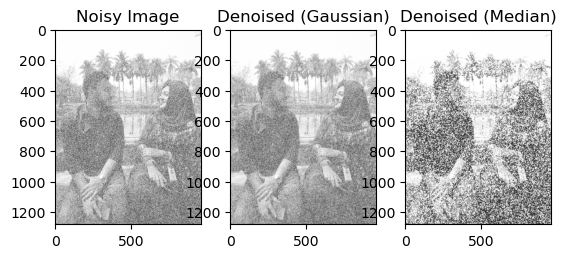

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image with noise
noisy_image = cv2.imread('noise.jpg')

# Apply Gaussian blur for noise reduction
denoised_image_gaussian = cv2.GaussianBlur(noisy_image, (5, 5), 0)

# Apply Median blur for salt-and-pepper noise reduction
denoised_image_median = cv2.medianBlur(noisy_image, 5)

# Display the noisy and denoised images
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Noisy Image')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(denoised_image_gaussian, cv2.COLOR_BGR2RGB))
plt.title('Denoised (Gaussian)')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(denoised_image_median, cv2.COLOR_BGR2RGB))
plt.title('Denoised (Median)')

plt.show()
